In [1]:
run empca_residuals

/usr/lib/python2.7/site-packages/setuptools-18.7.1-py2.7.egg/pkg_resources/__init__.py:1266: UserWarning: /home/price-jones/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).


In [2]:
redc = empca_residuals('red_clump',maskFilter,ask=True)

Type done at any prompt when finished
Data key: TEFF
Default is full range. Match or slice? slice
Upper limit (Enter for maximum): 
Lower limit (Enter for minimum): 
Found good limits
Data key: done
Done getting filter information


In [3]:
doplot=True
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


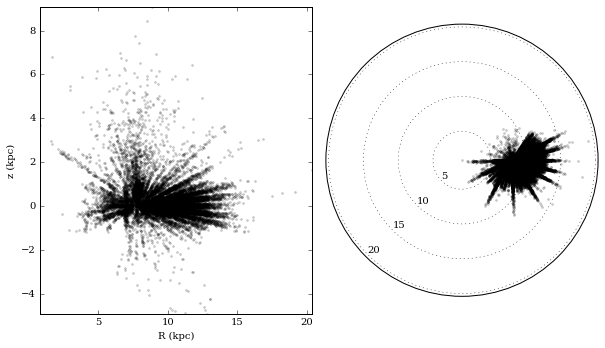

In [4]:
# Show the sample coverage in Galactocentric cylindrical coordinates
if doplot == True:
    redc.show_sample_coverage()

In [6]:
# To get fit results
# set gen=True to find residuals from scratch (~4 hr wait!)
# otherwise search in file
redc.findResiduals(gen=False)
redc.fitStatistic()

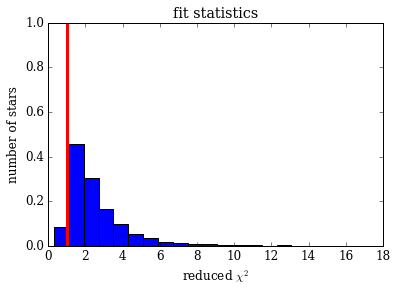

In [13]:
if doplot == True:
    redc.plotHistogram(redc.fitReducedChi,title = 'fit statistics',
                     xlabel='reduced $\chi^2$',bins=20)
    plt.axvline(1,lw=3,color='r')

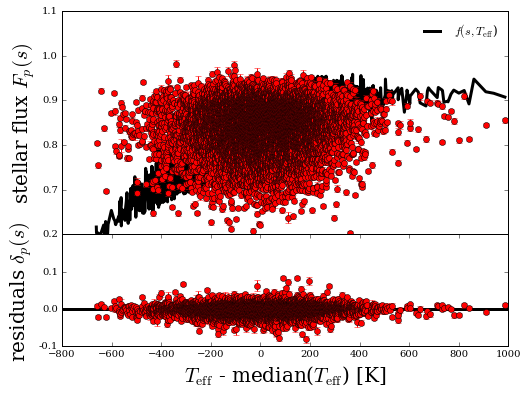

In [8]:
# Show an example of the fit
if doplot == True:
    redc.plot_example_fit(pixel=4313)

In [9]:
# To get EMPCA results
# set gen=True to find eigenvectors from scratch
# otherwise search in file

stdcorr = 'pickles/n6819_30pix.pkl'

fnames = ['eig60_madFalse_corrFalse.pkl',
          'eig60_madTrue_corrFalse.pkl',
          'eig60_madFalse_corr30pix.pkl',
          'eig60_madTrue_corr30pix.pkl']

redc.pixelEMPCA(nvecs=60,mad=False,correction=None,
                gen=False,savename=fnames[0])
redc.pixelEMPCA(nvecs=60,mad=True,correction=None,
                gen=False,savename=fnames[1])
redc.pixelEMPCA(nvecs=60,mad=False,correction=stdcorr,
                gen=False,savename=fnames[2])
redc.pixelEMPCA(nvecs=60,mad=True,correction=stdcorr,
                gen=False,savename=fnames[3])


In [10]:
run comparison_plots

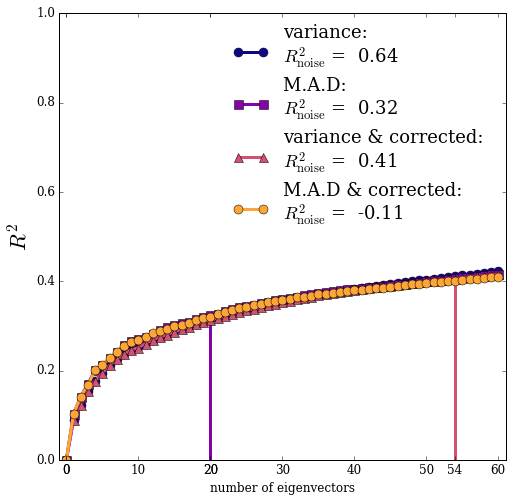

In [11]:
# See also from this package: plot_big_eig, plot_comb_eig and plot_eigenvector,
# each of which takes a list of eigenvectors. plot_eigenvector also requires a
# list of labels for the eigenvectors.
if doplot==True:
    comp_R2(fnames,direc=redc.name,
            labels = ['variance:','M.A.D:','variance & corrected:',
                      'M.A.D & corrected:'])
    

In [ ]:
# To test fit routines
redc.testFit(randomize=True)

if doplot==True:
    plt.figure(figsize=(8,8))
    redc.imshow(redc.diff.T/redc.fitCoeffErrs.T,
              title='deviation from input fit coefficients \nover their uncertainty')